In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
country_eng = pd.read_csv('/Users/xingobar/Downloads/japan-trade-statistics/country_eng.csv')
custom = pd.read_csv('/Users/xingobar/Downloads/japan-trade-statistics/custom.csv')
exp_custom_latest_ym = pd.read_csv('/Users/xingobar/Downloads/japan-trade-statistics/exp_custom_latest_ym.csv')

# Top Ten Country

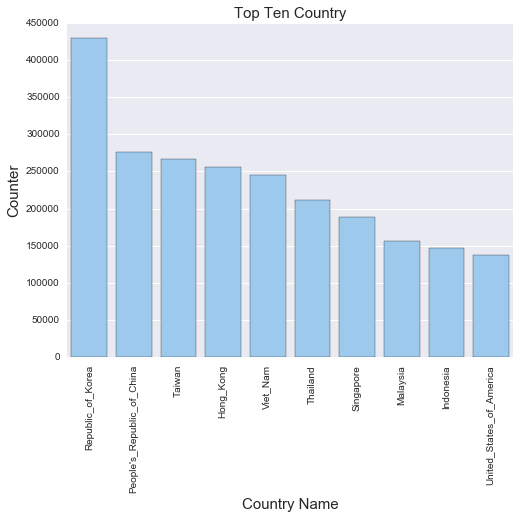

In [3]:
table_counter = exp_custom_latest_ym['Country'].value_counts()[:10]
table_index = table_counter.index
table_values = table_counter.values
## convert table_index to country name
table_index = country_eng[country_eng['Country'].isin(table_index)]['Country_name'].unique()

## plotting 
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = table_index,y = table_values,ax=ax,color='#90caf9')
plt.title('Top Ten Country',fontsize=15)
plt.ylabel('Counter',fontsize=15)
plt.xlabel('Country Name',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)

# (Top Ten) Country vs 2015

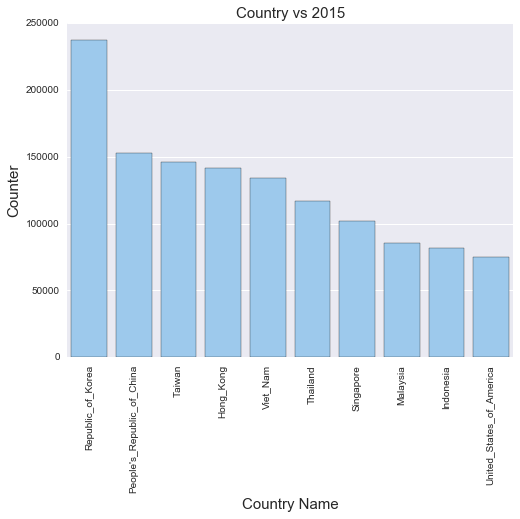

In [4]:
country_year = exp_custom_latest_ym[exp_custom_latest_ym['Year'] == 2015]
table_counter = country_year['Country'].value_counts()[:10]
table_index = table_counter.index
table_values = table_counter.values
## convert it to country name
table_index = country_eng[country_eng['Country'].isin(table_index)]['Country_name'].unique()

## plotting
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = table_index , y = table_values, ax =ax , color='#90caf9')
plt.title('Country vs 2015',fontsize=15)
plt.xlabel('Country Name',fontsize=15)
plt.ylabel('Counter',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)

# (heat map) Country vs The Total Value in year-month

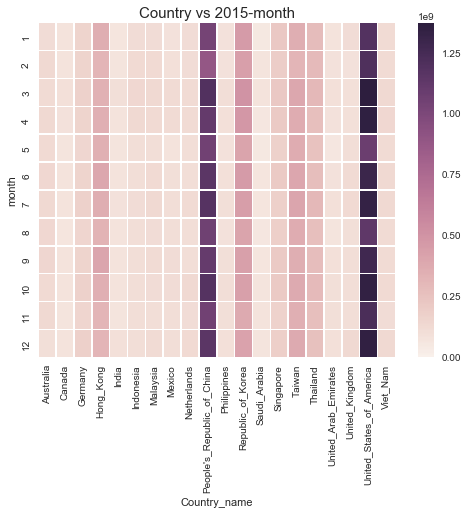

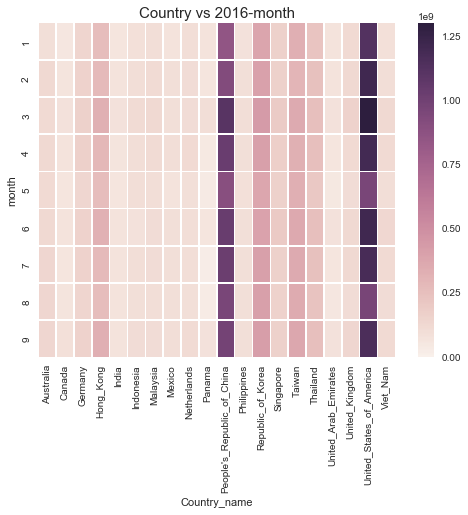

In [5]:
df = pd.merge(country_eng,exp_custom_latest_ym,on='Country')

### 2015
country_year_2015 = df[df['Year'] == 2015]
country_year = country_year_2015.groupby([country_year_2015['Country']])['Value'].sum()
country_year = country_year.sort_values(ascending=False)[:20]


table_count = pd.pivot_table(data = country_year_2015[country_year_2015['Country']\
                                                 .isin(country_year.index)],
              index=['month'],columns=['Country_name'],values=['Value'],aggfunc='sum')

## plotting
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Value'],vmin =0 ,ax = ax,annot=False,linewidth=.5)
plt.title('Country vs 2015-month',fontsize = 15)

## 2016
country_year_2016 = df[df['Year'] == 2016]
country_year = country_year_2016.groupby([country_year_2016['Country']])['Value'].sum()
country_year = country_year.sort_values(ascending=False)[:20]


table_count = pd.pivot_table(data = country_year_2016[country_year_2016['Country']\
                                                      .isin(country_year.index)],
              index=['month'],columns=['Country_name'],values=['Value'],aggfunc='sum')

## plotting
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Value'],vmin =0 ,ax = ax,annot=False,linewidth=.5)
plt.title('Country vs 2016-month',fontsize = 15)

In [6]:
hs4_eng = pd.read_csv('/Users/xingobar/Downloads/japan-trade-statistics/hs4_eng.csv')
hs2_eng = pd.read_csv('/Users/xingobar/Downloads/japan-trade-statistics/hs2_eng.csv')

# Top ten hs2

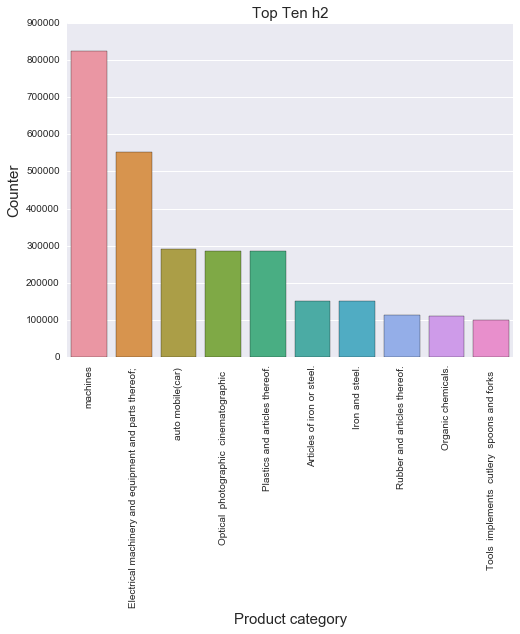

In [7]:
df = pd.merge(hs2_eng,exp_custom_latest_ym,on='hs2')
hs2_counts = df['hs2_name'].value_counts()[:10]
hs2_index = hs2_counts.index
hs2_values = hs2_counts.values

## Plotting
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = hs2_index , y=hs2_values,ax=ax)
plt.title('Top Ten h2',fontsize=15)
plt.xlabel('Product category',fontsize=15)
plt.ylabel('Counter',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)

# hs2 vs 2015

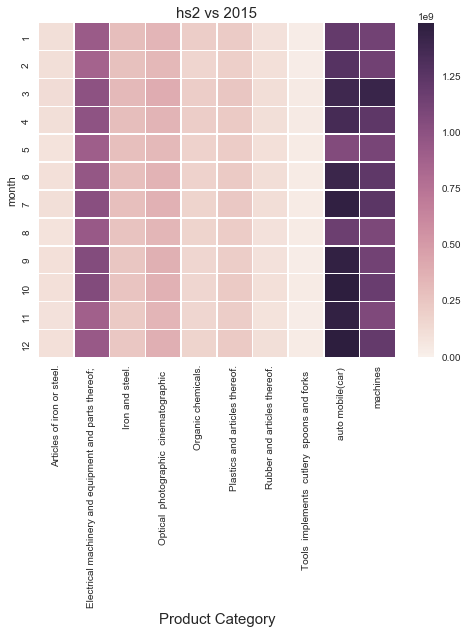

In [8]:
hs2_2015_data = df[df['Year'] == 2015]
hs2_2015 = hs2_2015_data.groupby(['hs2'])['Value'].size()
hs2_2015 = hs2_2015.sort_values(ascending=False)[:10]


table_count = pd.pivot_table(data=hs2_2015_data[hs2_2015_data['hs2'].isin(hs2_2015.index)],
                             index=['month'],
                             columns=['hs2_name'],
                             values=['Value'],
                             aggfunc='sum')

## Plotting
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Value'],ax=ax,vmin=0,linewidth=.5)
plt.title('hs2 vs 2015',fontsize=15)
plt.xlabel('Product Category',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)